
--- DataFrame Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store_Number  6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   int64  
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6    CPI          6435 non-null   int64  
 7   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 402.3+ KB

--- Summary Statistics ---

       Store_Number  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count   6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean      23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std       12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min        1.000000  2.099860e+05     

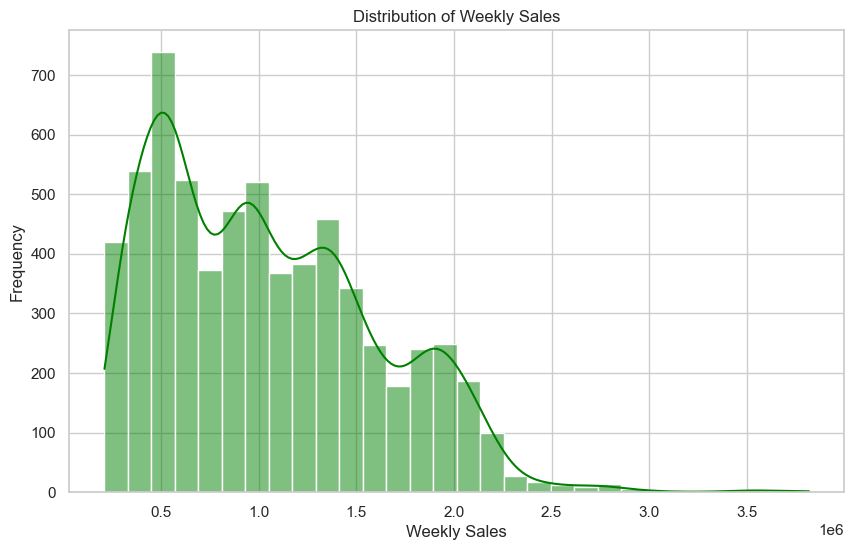

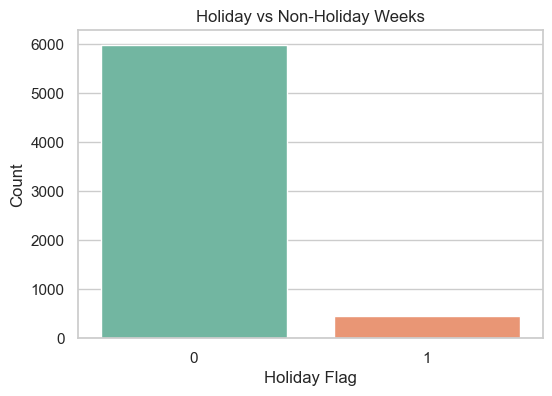

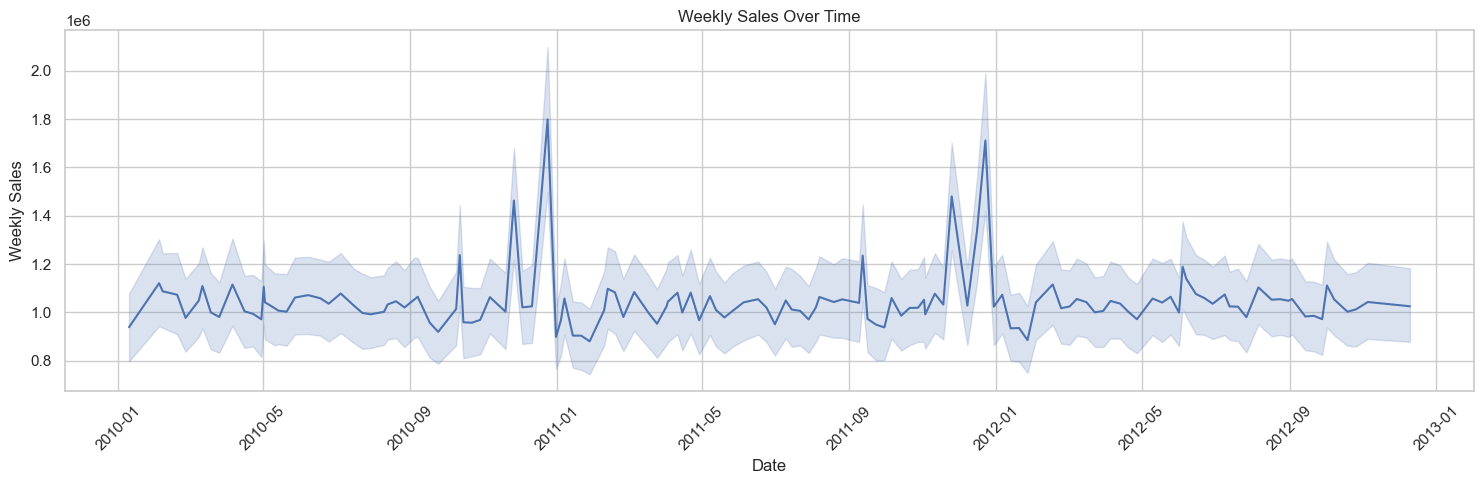

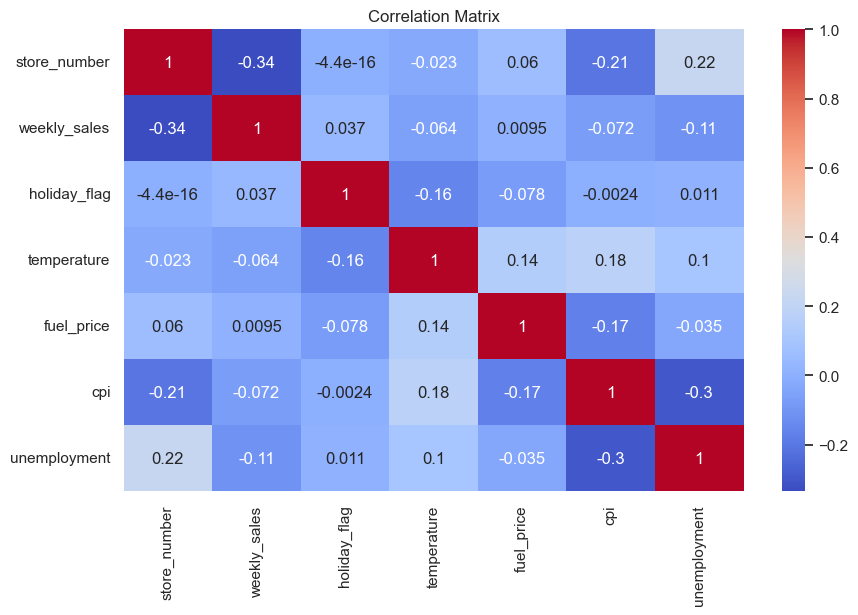

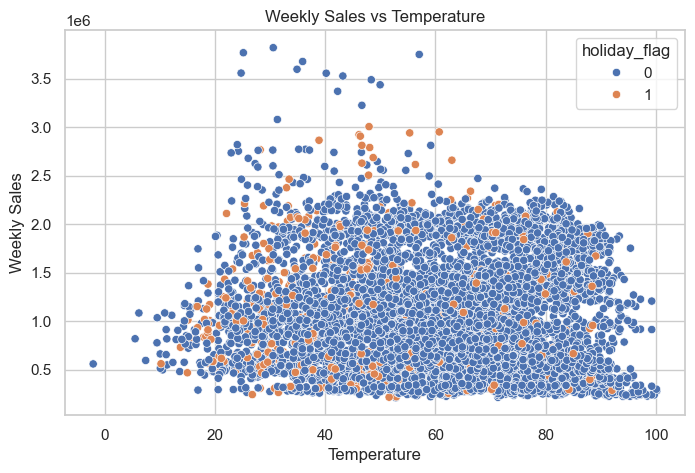

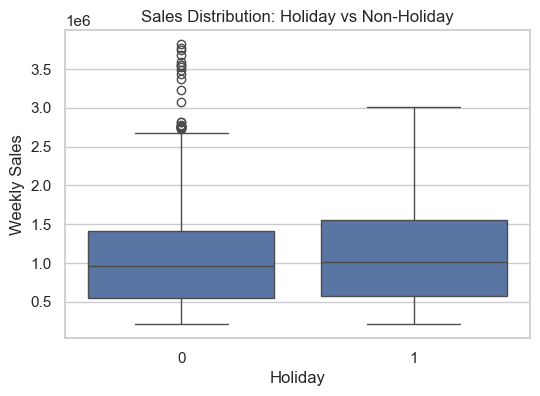

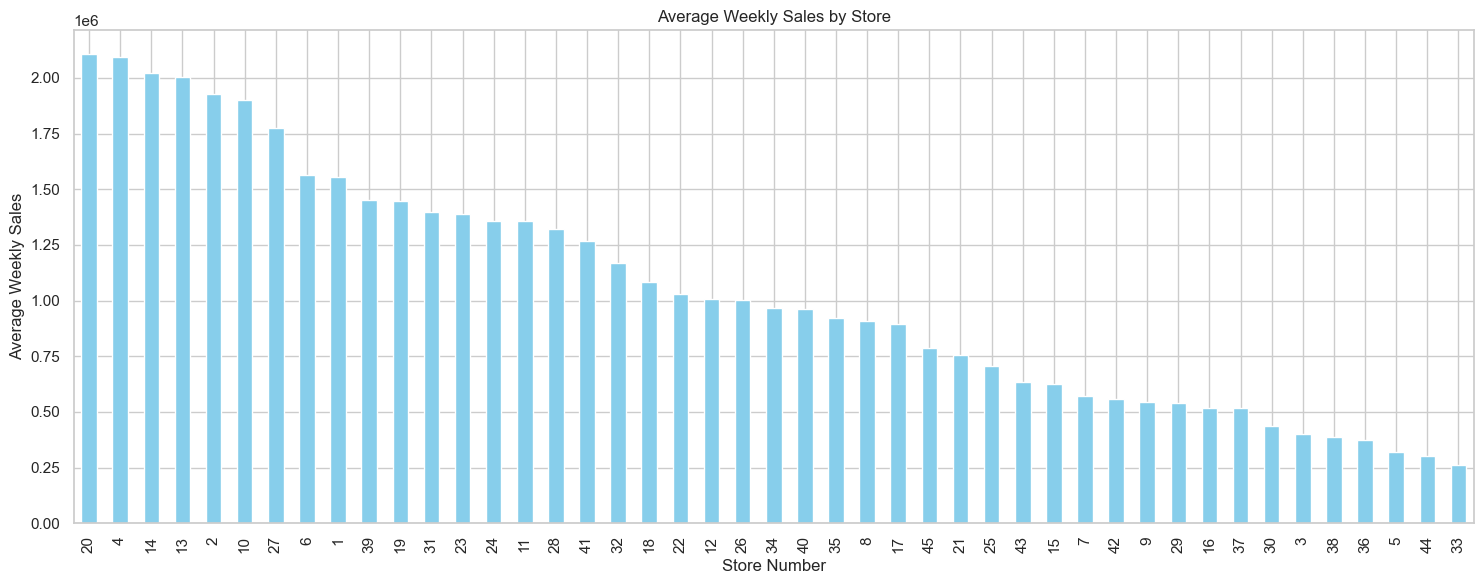

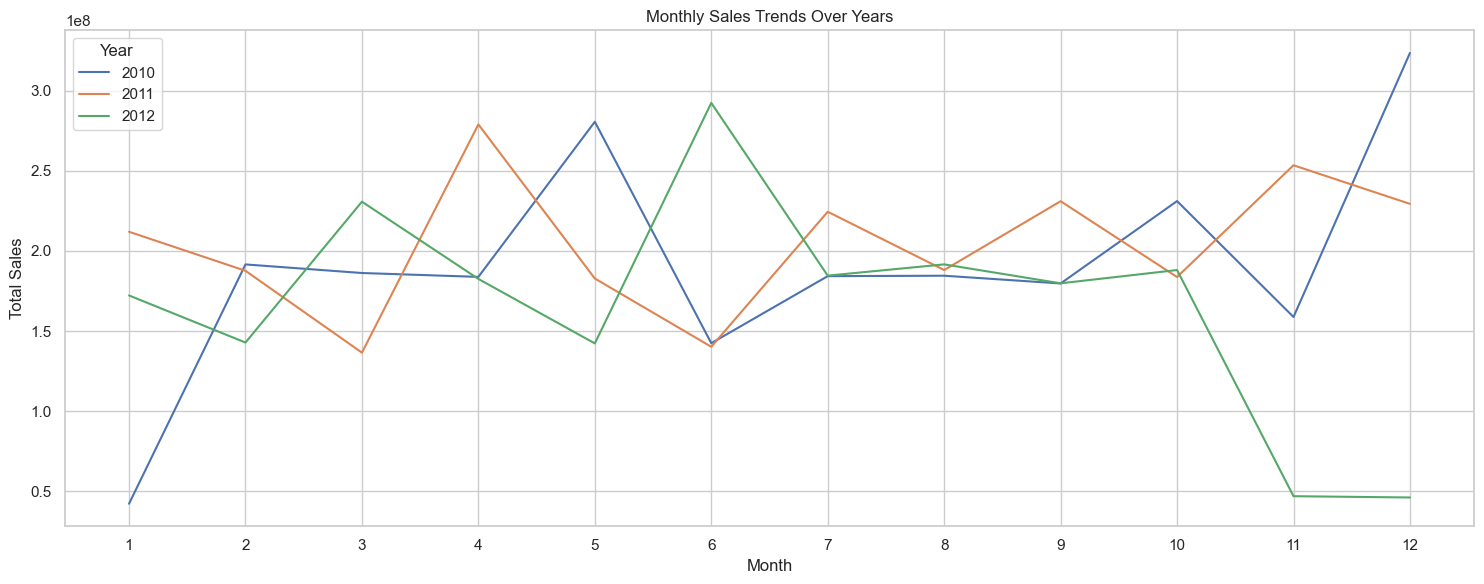

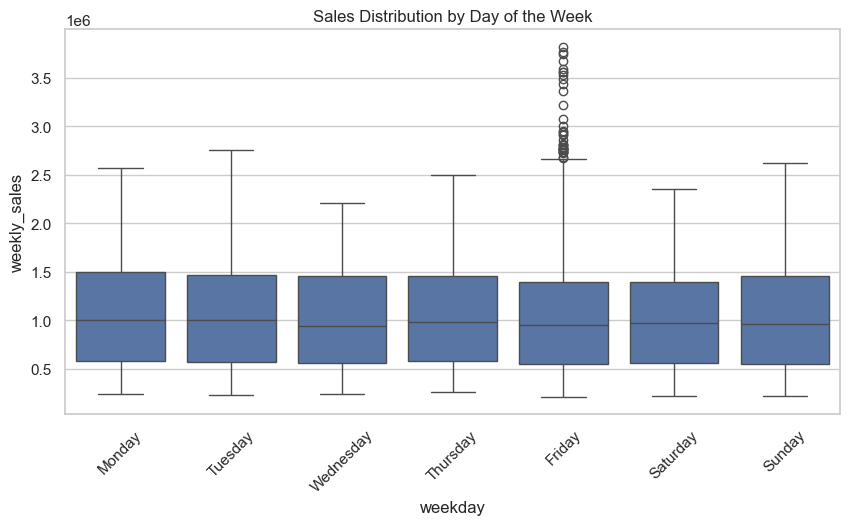

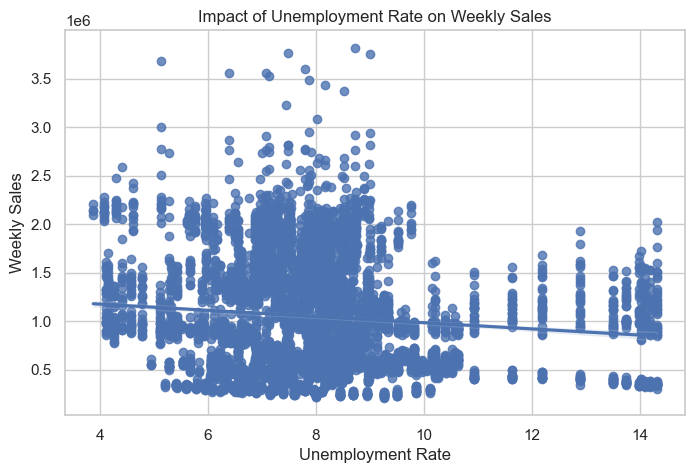


Cleaned data exported as 'cleaned_walmart_sales.csv'


In [1]:
# Walmart Sales Data EDA
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set visualization style
sns.set(style='whitegrid')

# Load the Data
file_path = r"C:\\Users\\USER\\OneDrive\\Documents\\Downloads\Walmart_sales_data.xlsx"
df = pd.read_excel(file_path, sheet_name='Walmart_sales_analysis')

# Basic Exploration
print("\n--- DataFrame Info ---\n")
df.info()
print("\n--- Summary Statistics ---\n")
print(df.describe())
print("\n--- Missing Values ---\n")
print(df.isnull().sum())
print("\n--- Duplicate Records ---\n")
print(df.duplicated().sum())

# Data Cleaning
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# Handle missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())
df.ffill(inplace=True)
print("\nMissing values after forward fill:")
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Univariate Analysis
plt.figure(figsize=(10,6))
sns.histplot(df['weekly_sales'], bins=30, kde=True, color='green')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# Holiday Flag Count
plt.figure(figsize=(6,4))
sns.countplot(x='holiday_flag', hue='holiday_flag', data=df, palette='Set2', legend=False)
plt.title('Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.show()

# Time Series Analysis
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='weekly_sales', data=df.sort_values('date'))
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Temperature vs Weekly Sales
plt.figure(figsize=(8,5))
sns.scatterplot(x='temperature', y='weekly_sales', hue='holiday_flag', data=df)
plt.title('Weekly Sales vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

# Boxplot: Holiday vs Non-Holiday Sales
plt.figure(figsize=(6,4))
sns.boxplot(x='holiday_flag', y='weekly_sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xlabel('Holiday')
plt.ylabel('Weekly Sales')
plt.show()

# Store-level Performance
store_sales = df.groupby('store_number')['weekly_sales'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,6))
store_sales.plot(kind='bar', color='red')
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

# Feature Engineering for Seasonal Insights
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.dayofweek >= 5

# Monthly Sales Trends
monthly_sales = df.groupby(['year', 'month'])['weekly_sales'].sum().unstack(0)
monthly_sales.plot(figsize=(15,6))
plt.title('Monthly Sales Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1,13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Weekly Sales by Day of Week
plt.figure(figsize=(10,5))
sns.boxplot(x='weekday', y='weekly_sales', data=df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Distribution by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Sales Category Feature
df['sales_category'] = pd.qcut(df['weekly_sales'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Impact of Unemployment on Sales
plt.figure(figsize=(8,5))
sns.regplot(x='unemployment', y='weekly_sales', data=df)
plt.title('Impact of Unemployment Rate on Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()

# Export Cleaned & Engineered Dataset
df.to_csv("cleaned_walmart_sales.csv", index=False)
print("\nCleaned data exported as 'cleaned_walmart_sales.csv'")

